# CTA200: Assignment 2
#### Jessica Patel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## Question 1

In [2]:
# First method derivative
def deriv1(f, x0, h):
    """Computes a numerical approximation of the derivative of a
    function at a given x-value x0, with stepsize h using the 
    first method.
    
    Parameters:
    f: python function
    x0: float
    h: float for stepsize where 0<h<1
    
    Returns:
    The approximate derivative as a python function.
    """
    return ( f(x0+h) - f(x0) ) / h

# Second method derivative
def deriv2(f, x0, h):
    """Computes a better numerical approximation of the derivative
    of a function at a given x-value x0, with stepsize h using the
    second method.
    
    Parameters:
    f: python function
    x0: float
    h: float for stepsize where 0<h<1
    
    Returns:
    The approximate derivative as a python function.
    """
    return ( f(x0+h) - f(x0-h) ) / (2*h)

In [3]:
# Choosing a variety of h-values
hs = np.arange(0.1, 1, 0.1)

# Creating empty arrays for the outputs, and iterating
# For method 1
out_1 = []
for i in hs:
    out_1.append(deriv1(f=np.sin, x0=0.1, h=i))
    
# For method 2
out_2 = []
for i in hs:
    out_2.append(deriv2(f=np.sin, x0=0.1, h=i))

print('Derivative approximations over various h')
print()
print('Method 1:', np.round(out_1, 4))
print()
print('Method 2:', np.round(out_2, 4))

Derivative approximations over various h

Method 1: [0.9884 0.9784 0.9653 0.949  0.9296 0.9073 0.8822 0.8544 0.824 ]

Method 2: [0.9933 0.9884 0.9801 0.9687 0.9541 0.9364 0.9157 0.8922 0.866 ]


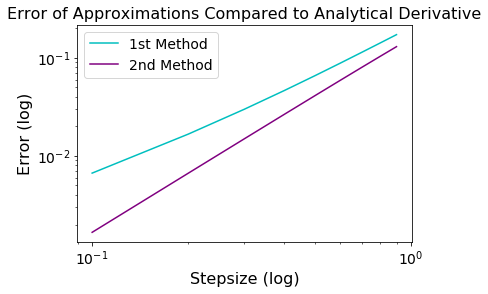

In [4]:
# Calculating the error compared to the analytical derivative

# Creating empty arrays and iterating
# For method 1
errors_1 = []
for i in hs:
    d_n = deriv1(np.sin, 0.1, i) # numerical derivative
    d_a = np.cos(0.1) # analytical derivative
    error_calc = abs(d_n - d_a) / d_a
    errors_1.append(error_calc)

# For method 2
errors_2 = []
for i in hs:
    d_n = deriv2(np.sin, 0.1, i) # numerical derivative
    d_a = np.cos(0.1) # analytical derivative
    error_calc = abs(d_n - d_a) / d_a
    errors_2.append(error_calc)

plt.title('Error of Approximations Compared to Analytical Derivative')
plt.loglog(hs, errors_1, label = '1st Method', c = 'c')
plt.loglog(hs, errors_2, label = '2nd Method', c='purple')
plt.xlabel('Stepsize (log)')
plt.ylabel('Error (log)')
plt.legend(fontsize = 14)
plt.savefig('Q1.pdf')

## Question 2

In [5]:
def zs(c, i_lim, z_lim):
    """ Computes and saves the iterations of the z_(i+1) equation for
    a given complex number until a limit of iterations or size of 
    the iteration is reached.
    
    Parameters:
    c = complex number
    i_lim = chosen limit of iterations
    z_lim = chosen limit of size of iterations
    
    Returns:
    An array of the iterations of the equation.
    """
    z_i = [] # empty array to put iterations in
    # initializing:
    i = 0
    z_0 = 0
    while i < i_lim: # limit of iterations
        if i == 0:
            z_1 = z_0**2 + c # z_(i+1) for i = 0
            z_i.append(z_1)
        if i > 0:
            z_ip1 = z_i[i-1]**2 + c # z_(i+1)
            z_i.append(z_ip1)
        # telling it to break in it approaches infinity quickly:
        if abs(z_i[i]) > z_lim: 
            break
        i += 1
    return z_i

In [6]:
def image1(x, y):
    """ Determines which points diverge or are bounded (abs(z_i_ < 2)
    and then plots them based on their classification.
    
    Parameters:
    x = real component of complex number
    y = imaginary component of complex number
    
    Returns:
    Image of the complex plane showing which points diverge or are 
    bounded.
    """
    # Creating empty arrays for bounded and diverging points:
    bounded_xs = []
    bounded_ys = []
    diverge_xs = []
    diverge_ys = []
    for i in x:
        for k in y:
            point = i + 1j * k # making numbers complex for zs() function
            point_zs = zs(point, 20, 1e20) # arbitrarily chosen limits - explained in write-up
            if abs(point_zs[-1]) < 2:
                bounded_xs.append(i)
                bounded_ys.append(k)
            else:
                diverge_xs.append(i)
                diverge_ys.append(k)
    plt.figure(figsize = (8,8))
    plt.scatter(diverge_xs, diverge_ys, c = 'indigo', label = 'Diverging')
    plt.scatter(bounded_xs, bounded_ys, c = 'c', s= 2, label = "Bounded")
    plt.legend(fontsize = 14)

Wall time: 1min 32s


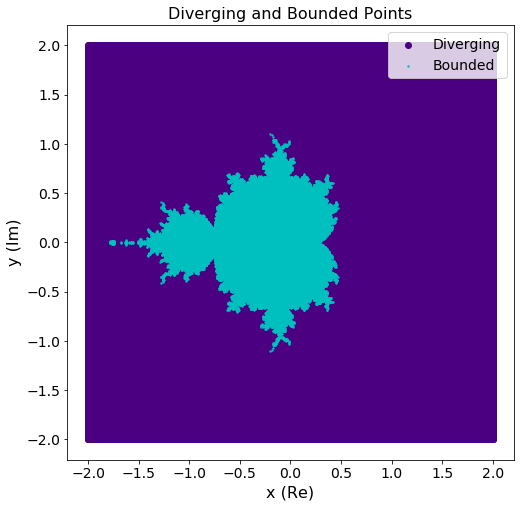

In [7]:
%%time

xs = np.linspace(-2, 2, 1000)
ys = np.linspace(-2, 2, 1000)

image1(xs, ys)
plt.title('Diverging and Bounded Points')
plt.xlabel('x (Re)')
plt.ylabel('y (Im)')
plt.savefig('Q2_1.pdf')

In [8]:
def image2(x,y):
    """ Determines after how many iterations points diverge and then
    plots a colour map.
    
    Parameters:
    x = real component of complex number
    y = imaginary component of complex number
    
    Returns:
    Colour map of the complex plane showing after how many iterations
    points diverge.
    """
    # Creating empty arrays to iterate into:
    # (X and Y keep track of coordinates which amount keeps track of their 
    # number of iterations)
    X = []
    Y = []
    amount = []
    for i in x:
        for k in y:
            X.append(i)
            Y.append(k)
            point = i + 1j * k # making numbers complex for zs() function
            # making z_lim = 2 to find number of z_i's it takes to reach abs(z_i) > 2:
            amount.append(np.size(zs(point, 20, 2)))
    plt.figure(figsize = (8,8))
    plt.scatter(X, Y, c=amount, cmap = 'viridis')
    plt.colorbar(label = 'Number of Iterations')

In [ ]:
%%time

image2(xs, ys)
plt.title('Number of Iterations Until Divergence')
plt.xlabel('x (Re)')
plt.ylabel('y (Im)')
plt.savefig('Q2_2.pdf')

## Question 3

In [ ]:
def ODE(t, y, N, beta, gamma):
    """
    Returns ODE's for SIR model of disease spread.
    
    Parameters:
    t: time
    y: array of [S, I, R]
    N: population size
    beta: float of fraction that are susceptible
    gamma: float of fraction that recovered
    """
    S, I, R = y
    return [-(beta*S*I)/N, (beta*S*I)/N - gamma*I, gamma*I]

# Set the initial conditions
y0 = [999, 1, 0]

# Choose N, beta, gamma
N = 1000
beta_gamma = [[0.8, 0.5], [0.6, 0.3], [0.4, 0.1]]

# Begin and end time, timestep
t0 = 0
t_end = 200
dt = 0.1

# for loop that solves the equations for various beta and gamma values
for i in beta_gamma:
    
    # Array to store the results
    times = [t0]
    res = [y0]
    
    solver = ode(ODE).set_integrator('dopri5').set_initial_value(y0, t0).set_f_params(N, i[0], i[1])

    # Solve the equation
    while solver.successful() and solver.t < t_end:
        times.append(solver.t + dt)
        res.append(solver.integrate(solver.t + dt))
    
    S, I, R = np.array(res).T
    times = np.array(times)

    # plot the results
    plt.figure(figsize = (7,7))
    plt.title('SIR Model Over Time for (beta, gamma)=' + str(i), fontsize = 16)
    plt.xlabel('Time', fontsize = 16)
    plt.ylabel('Number of People', fontsize = 16)
    plt.plot(times, S, label = 'Susceptible', c = 'c')
    plt.plot(times, I, label = 'Infected', c = 'purple')
    plt.plot(times, R, label = 'Recovered', c = 'forestgreen')
    plt.legend(fontsize = 14)
    plt.grid(alpha = 0.6)
    plt.savefig('Q3_'+str(i) + '.pdf')